## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.09.08
- 성명 : 이정현
- 점수 : 85점

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
mathematics = df['mathematics']
mathematics

student number
1     65
2     80
3     63
4     63
5     76
6     60
7     81
8     66
9     78
10    82
11    94
12    75
13    70
14    77
15    84
16    84
17    82
18    85
19    90
20    70
21    78
22    93
23    77
24    88
25    82
26    76
27    87
28    84
29    77
30    82
31    91
32    75
33    76
34    78
35    57
36    89
37    83
38    69
39    86
40    81
41    81
42    80
43    79
44    87
45    84
46    71
47    80
48    77
49    83
50    88
Name: mathematics, dtype: int64

In [10]:
m_mean = mathematics.mean()
m_med = mathematics.median()
m_mode = mathematics.mode()
m_var = mathematics.var()
m_std = mathematics.std()
m_range = np.max(mathematics) - np.min(mathematics)
print(m_mean,'\n',m_med,'\n',m_mode,'\n',m_var,'\n',m_std,'\n',m_range,'\n')

78.88 
 80.0 
 0    77
1    82
2    84
Name: mathematics, dtype: int64 
 70.80163265306118 
 8.414370603500965 
 37 



In [11]:
mathematics_Q1 = np.percentile(mathematics,25)
mathematics_Q3 = np.percentile(mathematics,75)
mathematics_IQR = mathematics_Q3 - mathematics_Q1
mathematics_IQR

8.0

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [12]:
score = df.english
type(score)

pandas.core.series.Series

In [21]:
z = (score - np.mean(score))/np.std(score)
z = np.array(z)
z[:5]

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869])

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

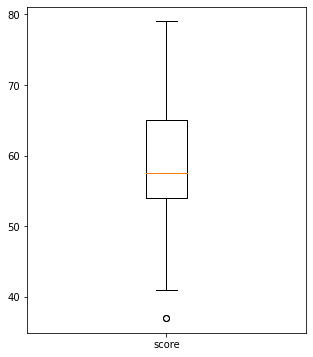

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(score, labels=['score'])

plt.show()

In [24]:
# 이상치 값
score_Q1 = np.percentile(score,25)
score_Q3 = np.percentile(score,75)
score_IQR = score_Q3 - score_Q1
score_IQR

11.0

In [31]:
# 이상치에 해당하는 인덱스
a = np.where((score<score_Q1)|((score>score_Q3)))
a

(array([ 0,  1,  3,  5,  7, 10, 11, 12, 15, 16, 17, 18, 19, 23, 26, 28, 30,
        33, 34, 35, 43, 45, 46, 49], dtype=int64),)

In [32]:
# 이상치 제거
b = np.where((score>=score_Q1)|((score<=score_Q3)))
b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64),)

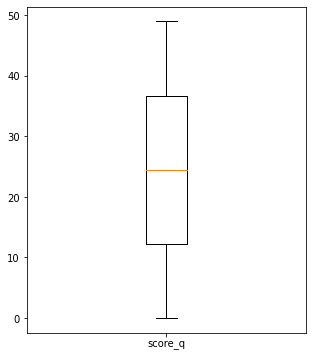

In [33]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(b, labels=['score_q'])

plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [37]:
#scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
gong = np.cov(en_scores, ma_scores, ddof=0)
print(gong)

[[86.   62.8 ]
 [62.8  68.44]]


In [52]:
#scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
%precision 2
cor = np.corrcoef(en_scores, ma_scores)
cor

array([[1.  , 0.82],
       [0.82, 1.  ]])

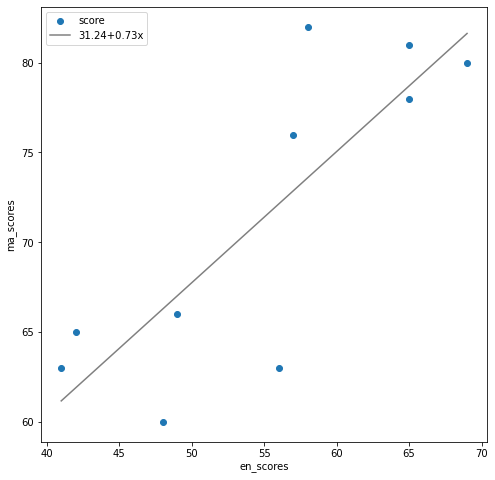

In [56]:
# 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력)
poly_fit = np.polyfit(en_scores,ma_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(en_scores.min(),en_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(en_scores,ma_scores,label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('en_scores')
ax.set_ylabel('ma_scores')

ax.legend(loc='upper left')

plt.show()

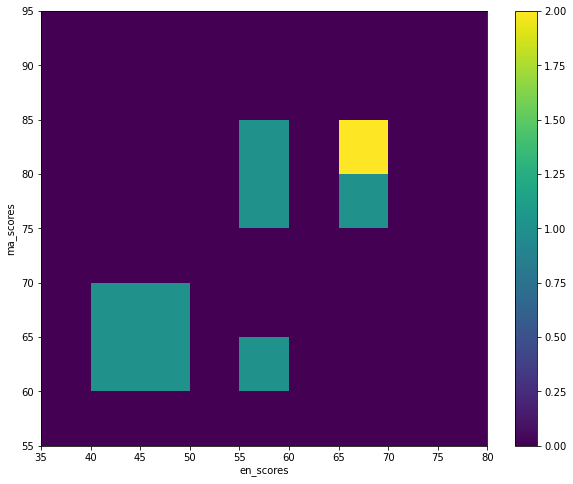

In [57]:
# 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(en_scores, ma_scores,
             bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('en_scores')
ax.set_ylabel('ma_scores')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [59]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [69]:
# 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행
s_m=[]
for i in range(10000):
    sample = np.random.choice(scores,20)
    s_mean = sample.mean()
    s_m.append(s_mean)
print(s_m)

[70.1, 68.9, 71.7, 69.2, 73.45, 68.9, 71.7, 74.4, 68.25, 71.05, 69.7, 69.5, 77.85, 69.85, 62.25, 63.45, 68.4, 68.35, 69.15, 61.5, 65.0, 67.6, 72.65, 71.3, 70.7, 70.2, 71.45, 73.05, 71.45, 68.1, 73.75, 69.6, 70.75, 65.45, 74.35, 73.55, 74.6, 62.3, 67.45, 73.45, 70.45, 63.95, 75.4, 71.2, 69.5, 68.3, 68.8, 69.2, 71.05, 69.55, 70.55, 65.8, 72.0, 66.25, 69.4, 73.75, 71.45, 73.0, 69.45, 76.1, 66.45, 71.25, 65.55, 67.75, 71.65, 70.15, 68.25, 70.5, 67.8, 72.6, 69.5, 67.95, 71.75, 68.3, 69.4, 67.3, 60.75, 67.7, 64.45, 66.9, 74.65, 63.65, 71.05, 75.35, 70.4, 66.3, 73.35, 65.35, 67.45, 72.4, 66.55, 68.75, 71.45, 72.9, 68.6, 70.95, 74.1, 71.7, 71.25, 68.55, 69.05, 66.25, 72.55, 67.95, 66.8, 63.85, 67.15, 78.0, 67.95, 74.75, 63.2, 65.95, 69.9, 64.6, 63.95, 68.0, 69.15, 67.4, 73.35, 71.45, 77.45, 65.05, 65.05, 63.5, 74.9, 69.65, 69.55, 67.5, 70.6, 72.65, 67.15, 68.4, 72.85, 70.7, 69.3, 71.05, 70.0, 69.8, 68.5, 74.25, 68.6, 62.95, 67.85, 69.25, 71.8, 70.0, 68.8, 69.65, 70.3, 71.05, 69.05, 69.0, 69.55

<function matplotlib.pyplot.show(close=None, block=None)>

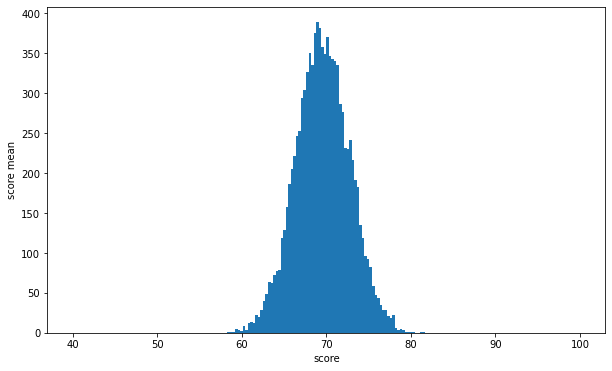

In [76]:
# 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(s_m, bins=200, range=(40,100))

ax.set_xlabel('score')
ax.set_ylabel('score mean')

plt.show

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [77]:
from scipy import stats
%matplotlib inline

In [99]:
linestyles = ['-','--',':']

def E(X,g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X,g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):4}')
    print(f'variance {(V(X)):4}')


In [100]:
# Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산
p = 0.5
v = 0.5*0.5
p,v

(0.50, 0.25)

In [101]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set,f

In [102]:
X = Bern(0.5)
E(X), V(X)

(0.50, 0.25)

In [103]:
check_prob(X)

expected value  0.5
variance 0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [104]:
n = 10
p = 0.5
ex = n*p
vx = n*p*(1-p)
ex,vx

(5.00, 2.50)

In [105]:
from scipy.special import comb
# 조합 계산할 때 임포트

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p ** x * (1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [106]:
X = Bin(10,0.5)
E(X), V(X)

(5.00, 2.50)

In [107]:
check_prob(X)

expected value  5.0
variance  2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [108]:
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set,f

In [109]:
X = Poi(2)
E(X), V(X)

(2.00, 2.00)

In [110]:
check_prob(X)

expected value 1.9999999999987046
variance 1.9999999999788727


Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

In [124]:
from scipy import stats,integrate
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings('ignore',
                       category=integrate.IntegrationWarning)
def plot_prob(X, x_min, x_max): 
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')

    ax.legend()
    plt.show()

In [125]:
def N(mu, sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

In [126]:
mu, sigma = 10,3
X = N(mu,sigma)

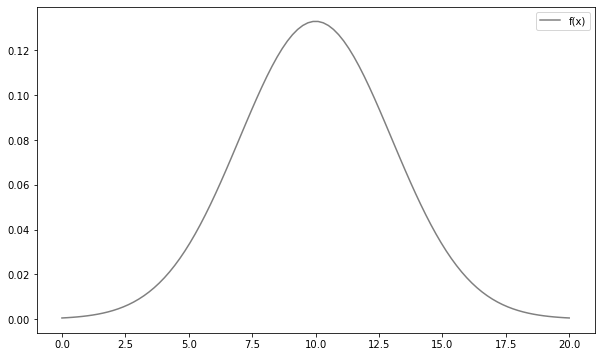

In [127]:
plot_prob(X,0,20)

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

In [128]:
def plot_prob(X, x_min, x_max): 
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

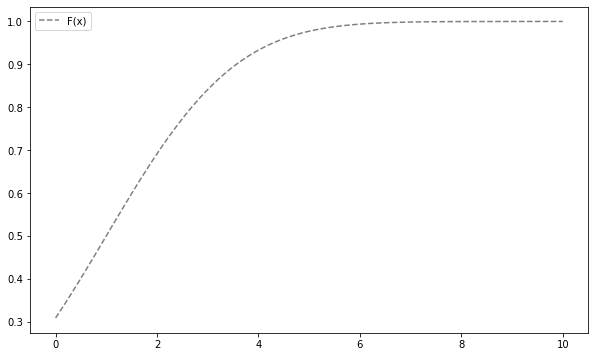

In [130]:
mu, sigma = 1,2
X = N(mu,sigma)
plot_prob(X,0,10)

Q11. "5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [169]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [170]:
# df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
df2 = df1.copy()
df2.replace(['A','B'],['C','D'],inplace=True)
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [171]:
# df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성
df2.loc[df2.species=='C','length']=  df2.length * 2
df2.loc[df2.species=='D','length']=  df2.length * 3

In [172]:
df = pd.concat([df1,df2],axis=0)
df = df.reset_index()
df

,index,species,length
0,0,A,2
1,1,A,3
2,2,A,4
3,3,B,6
4,4,B,8
5,5,B,10
6,0,C,4
7,1,C,6
8,2,C,8
9,3,D,18


In [178]:
gby = df['length'].groupby(df['species'])
gby.mean()

species
A     3.0
B     8.0
C     6.0
D    24.0
Name: length, dtype: float64

In [179]:
gby.std()

species
A    1.0
B    2.0
C    2.0
D    6.0
Name: length, dtype: float64

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [180]:
import pandas as pd
shoes = pd.read_csv("5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [181]:
#4행 3열을 복사 후 추가하여 8행 3열로 작성
shoes2 = shoes1.copy()
shoes2

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [182]:
shoes = pd.concat([shoes1,shoes2],axis=0)
shoes = shoes.reset_index()
shoes

,index,store,color,sales
0,0,tokyo,blue,10
1,1,tokyo,red,15
2,2,osaka,blue,13
3,3,osaka,red,9
4,0,tokyo,blue,10
5,1,tokyo,red,15
6,2,osaka,blue,13
7,3,osaka,red,9


In [185]:
# 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
shoes.pivot_table(values='sales', index= 'store', columns = 'color',aggfunc='sum', fill_value=0)

color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [186]:
titanic = pd.read_csv('titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [190]:
tp = titanic.pivot_table(index='pclass',columns='sex',values='survived',aggfunc='mean',fill_value=0)
tp

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


In [192]:
import seaborn as sns

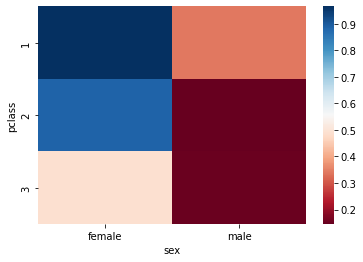

In [197]:
fig,axes = plt.subplots(figsize=(6,4))
sns.heatmap(tp,cmap='RdBu',ax=axes)
plt.xlabel('sex')
plt.ylabel('pclass')
plt.show()

In [ ]:
#인사이트
- 남자가 여자보다 전체적으로 생존확률이 현저히 낮다
- 여자는 pclass가 3-2-1등급 순으로 생존확률이 높아진다.(남자는 2,3등급 차이 없음)

## Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [198]:
def N(mu, sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

nomal = N(4,0.8)
#emp = np.zeros(10000)

li=[]
for i in range(10000):
    sample = np.random.choice(nomal,10)
    s_mean = sample.mean()
    li.append(s_mean)
print(li)

z = np.array(li)
z[:10]

C:\Users\user\AppData\Local\Temp\ipykernel_14172\2432308557.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample = np.random.choice(nomal,10)


TypeError: can only concatenate list (not "function") to list

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

In [200]:
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.00, 5.00)

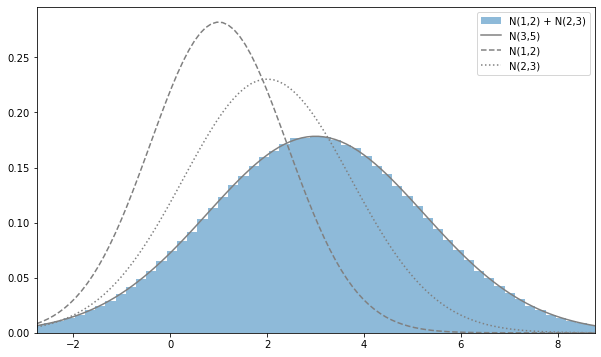

In [201]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1,2) + N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

In [202]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(7.00, 7.00)

C:\Users\user\AppData\Local\Temp\ipykernel_14172\3729651887.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_sample, bins=20, range=(0,20),normed=True)


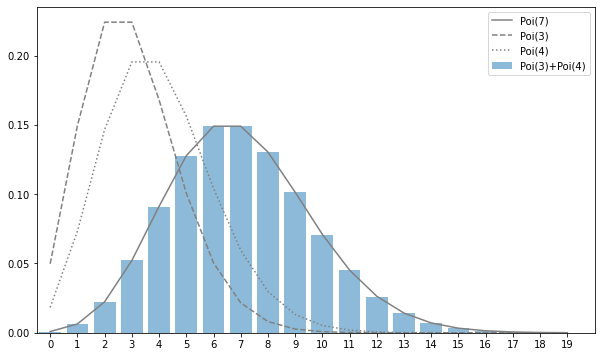

In [203]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample, bins=20, range=(0,20),normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3)+Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

In [204]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
sum_sample = np.sum(Xs_sample,axis=0)

np.mean(sum_sample), np.var(sum_sample)

(3.00, 2.10)

C:\Users\user\AppData\Local\Temp\ipykernel_14172\2585984585.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_sample, bins=10, range=(0,10),normed=True)


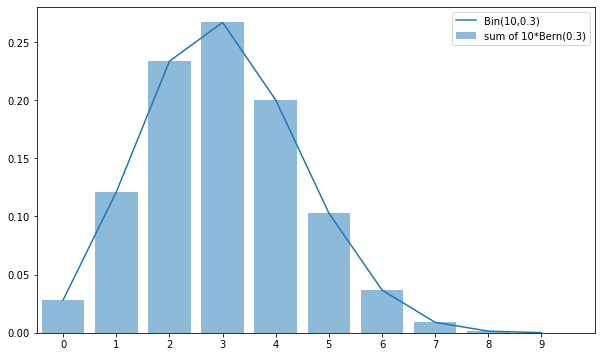

In [205]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist,_ = np.histogram(sum_sample, bins=10, range=(0,10),normed=True)

ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10,0.3)')

ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

In [ ]:
표본평균의 분포는 정규분포에 가까워진다

In [206]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample,axis=0)

rv_true = stats.norm(l, np.sqrt(1/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

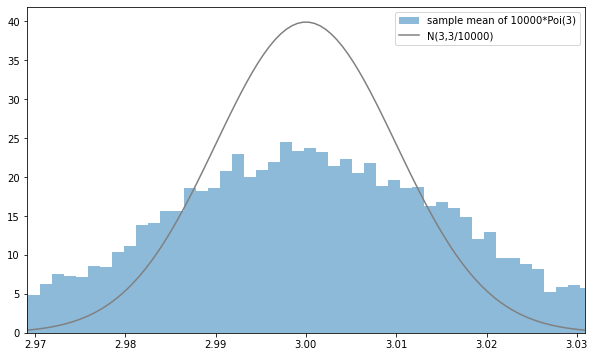

In [207]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3,3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [208]:
df = pd.read_csv('ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [213]:
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [217]:
# 실제 감튀의 평균
s_mean = np.mean(sample)
s_mean

128.45

In [215]:
rv = stats.norm(130,np.sqrt(9/14))
rv.isf(0.95)

128.68

- 단측검정

In [216]:
# 검정통계량
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.93

In [218]:
#임계값
rv = stats.norm()
rv.isf(0.95)

-1.64

In [219]:
# p값
rv.cdf(z)

0.03

In [ ]:
p값이 유의수준 0.05보다 작음 -> 귀무가설 기각

- 양측검정

In [220]:
# 검정통계량
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.93

In [221]:
#임계값
rv = stats.norm()
rv.interval(0.95)

(-1.96, 1.96)

In [222]:
# 누적밀도함수 *2
rv.cdf(z)*2

0.05

In [ ]:
p값이 유의수준 0.05보다 큼 -> 귀무가설 기각되지 않음